## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import urllib.request

## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col='laptop_ID')
df.index.name = None

## Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [5]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [6]:
df['inches_num'] = df['Inches']
df['weight_kg'] = df['Weight'].str.replace('kg', '').astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(float)

In [7]:
df.describe()

,Inches,Price_in_euros,inches_num,weight_kg,ram_gb
count,912.000000,912.000000,912.000000,912.000000,912.000000
mean,14.981579,1111.724090,14.981579,2.026937,8.263158
std,1.436719,687.959172,1.436719,0.665466,5.044788
min,10.100000,174.000000,10.100000,0.690000,2.000000
25%,14.000000,589.000000,14.000000,1.490000,4.000000
50%,15.600000,978.000000,15.600000,2.040000,8.000000
75%,15.600000,1483.942500,15.600000,2.300000,8.000000
max,18.400000,6099.000000,18.400000,4.700000,64.000000


In [8]:
df = df.copy()

In [9]:
df.drop(columns='Ram', inplace=True)
df.drop(columns='Weight', inplace = True)
df.drop(columns='Inches', inplace = True)

## Procesado de datos

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

In [11]:
target = 'Price_in_euros'

<Axes: xlabel='Price_in_euros', ylabel='Count'>

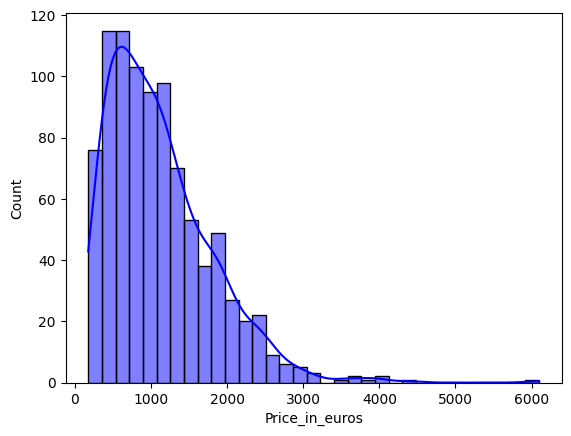

In [12]:
sns.histplot(df.Price_in_euros, kde = True, color = 'Blue')

## Modelado

### 1. Definir X e y

In [13]:
features_num = ['inches_num', 'weight_kg', 'ram_gb']
target = ['Price_in_euros']

In [14]:
# X = df.drop(['Price_in_euros'], axis=1)
# y = df['Price_in_euros'].copy()
# X.shape

### 2. Dividir X_train, X_test, y_train, y_test

In [15]:
train_set, test_set = train_test_split(df, test_size = 0.20, random_state = 42)

In [16]:
x_train = train_set.drop(['Price_in_euros'], axis = 1)
y_train = train_set['Price_in_euros']

x_test = test_set.drop(['Price_in_euros'], axis = 1)
y_test = test_set['Price_in_euros']

Correlación de las variables numéricas con la target

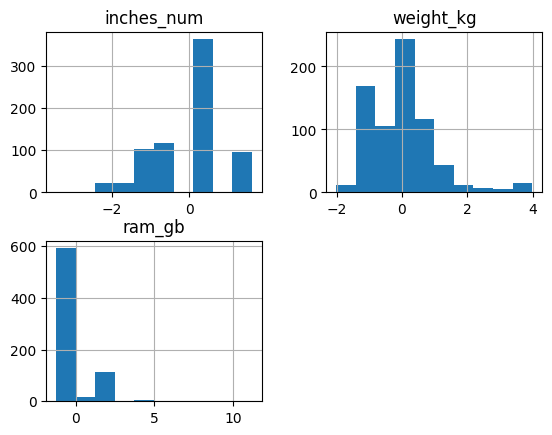

In [91]:
train_set[features_num].hist();

In [92]:
# corr = train_set.corr(numeric_only=True)
# serie_corr = np.abs(corr[target])
# serie_corr

Escalado

In [93]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(train_set[features_num])

In [94]:
# train_set[features_num] = scaler.transform(train_set[features_num])

In [95]:
x_train = train_set[features_num]
y_train = train_set[target]

x_test = test_set[features_num]
y_test = test_set[target]

In [96]:
x_train

,inches_num,weight_kg,ram_gb
1118,1.608931,1.447238,-0.046800
153,0.418230,0.788210,1.558700
275,-1.192719,-0.994161,-0.046800
1100,-0.702430,-0.739537,-0.849549
131,1.608931,1.147680,1.558700
...,...,...,...
578,-0.702430,-0.140420,-0.046800
996,0.418230,0.249005,-0.448174
770,-1.753048,-1.278742,1.558700
407,0.418230,0.249005,-0.849549


Codificación de las variables categóricas

In [98]:
train_set.head(1)

,Company,Product,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price_in_euros,inches_num,weight_kg,ram_gb,Company_encoded,TypeName_encoded,ScreenResolution_encoded,Cpu_encoded,Memory_encoded,Gpu_encoded,OpSys_encoded
1118,HP,ZBook 17,Workstation,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,1TB HDD,AMD FirePro W6150M,Windows 7,2899.0,1.608931,1.447238,-0.0468,7.0,5.0,14.0,73.0,10.0,2.0,7.0


In [100]:
encoder = OrdinalEncoder()
train_set['Company_encoded'] = encoder.fit_transform(train_set[['Company']])
train_set['TypeName_encoded'] = encoder.fit_transform(train_set[['TypeName']])
train_set['ScreenResolution_encoded'] = encoder.fit_transform(train_set[['ScreenResolution']])
train_set['Cpu_encoded'] = encoder.fit_transform(train_set[['Cpu']])
train_set['Memory_encoded'] = encoder.fit_transform(train_set[['Memory']])
train_set['Gpu_encoded'] = encoder.fit_transform(train_set[['Gpu']])
train_set['OpSys_encoded'] = encoder.fit_transform(train_set[['OpSys']])

In [101]:
features_cat = [col for col in train_set if col.endswith('_encoded')]

In [102]:
corr_categoricas = train_set[features_cat + ['Price_in_euros']].corr()
corr_categoricas.Price_in_euros

Company_encoded             0.149400
TypeName_encoded           -0.180040
ScreenResolution_encoded    0.424385
Cpu_encoded                 0.508878
Memory_encoded              0.156357
Gpu_encoded                 0.429162
OpSys_encoded               0.266028
Price_in_euros              1.000000
Name: Price_in_euros, dtype: float64

In [103]:
criterio = 0.25
for categoria in features_cat:
    if abs(corr_categoricas.loc[categoria, 'Price_in_euros']) < criterio:
        features_cat.remove(categoria)

In [104]:
x_train = train_set[features_cat + features_num]

### 3. Baseline de modelos


In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [106]:
X = x_train
y = y_train

In [107]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los valores negativos a positivos y calcular RMSE
rmse_scores = (-scores) ** 0.5

# Mostrar los resultados
print(f"RMSE en cada fold: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean()}")

RMSE en cada fold: [388.2902383  368.80854096 384.60899609 360.75711292 485.73258534]
RMSE promedio: 397.6394947210505


In [83]:
test_set['Company_encoded'] = encoder.fit_transform(test_set[['Company']])
test_set['TypeName_encoded'] = encoder.fit_transform(test_set[['TypeName']])
test_set['ScreenResolution_encoded'] = encoder.fit_transform(test_set[['ScreenResolution']])
test_set['Cpu_encoded'] = encoder.fit_transform(test_set[['Cpu']])
test_set['Memory_encoded'] = encoder.fit_transform(test_set[['Memory']])
test_set['Gpu_encoded'] = encoder.fit_transform(test_set[['Gpu']])
test_set['OpSys_encoded'] = encoder.fit_transform(test_set[['OpSys']])

In [108]:
x_test = test_set[features_cat + features_num]

In [109]:
y_pred = model.predict(x_test)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [110]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

1925.3742060078114

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [29]:
X_pred = pd.read_csv("data/test.csv", index_col = 'laptop_ID')
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [30]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [31]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


In [32]:
X_pred['inches_num'] = X_pred['Inches']
X_pred['weight_kg'] = X_pred['Weight'].str.replace('kg', '').astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(float)

 ## 2. Replicar el procesado para ``test.csv``

In [33]:
X_pred_1 = X_pred[features_num].copy()

In [34]:
predictions_submit = model.predict(X_pred_1)
predictions_submit

array([[ 7431.03851469],
       [ 1298.09332721],
       [ 1273.25745948],
       [ 3332.02699699],
       [ 1477.712658  ],
       [ 1093.43283682],
       [ 1473.73891916],
       [ 3157.6165935 ],
       [ 7426.07134115],
       [ 1460.32755059],
       [ 7310.81997459],
       [ 3573.63321639],
       [ 1103.36718392],
       [ 7476.23979396],
       [ 3317.57252197],
       [ 1270.77387271],
       [ 7420.11073289],
       [ 3568.16932549],
       [ 3496.19841805],
       [ 1293.12615366],
       [ 7471.27262042],
       [ 1536.27219686],
       [ 3139.23805138],
       [ 3585.5544329 ],
       [ 2315.28368491],
       [ 3332.47404261],
       [ 3140.23148609],
       [ 1652.57010711],
       [ 7313.80027872],
       [ 3507.12619985],
       [ 7284.99067215],
       [ 1283.19180657],
       [ 3320.05610875],
       [15494.04083282],
       [ 7365.47182388],
       [ 7241.27954494],
       [ 1287.16554541],
       [ 7436.00568824],
       [ 3340.42152029],
       [ 3577.11023787],


**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [35]:
# ¿Qué opináis?
# ¿Sí, no?

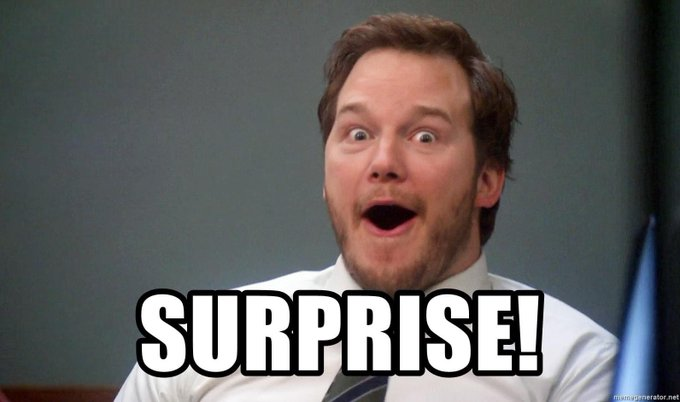

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [36]:
sample = pd.read_csv("data/sample_submission.csv")

In [37]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [38]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [39]:
predictions_submit = predictions_submit.ravel()

In [40]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({'laptop_ID':X_pred.index, 'Price_in_euros': predictions_submit})

In [41]:
submission.head()

,laptop_ID,Price_in_euros
0,209,7431.038515
1,1281,1298.093327
2,1168,1273.257459
3,1231,3332.026997
4,1020,1477.712658


In [42]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [43]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission_2.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [44]:
chequeador(submission)

You're ready to submit!
